# Hierarchical Clustering in Python with SciPy

### Step 1 – Import Necessary Libraries


In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

### Step 2 – Load and Preprocess the Dataset


In [3]:
# Load the dataset
df= pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
print(df.shape)

(200, 5)


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [7]:
df.drop("CustomerID",axis=1,inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [8]:

# Standardize data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Normalizing the Data
normalized_df = normalize(scaled_df)

# Converting the numpy array into a pandas DataFrame
normalized_df = pd.DataFrame(normalized_df)

# Reducing the dimensions of the data
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(normalized_df)
data_pca = pd.DataFrame(data_pca)
data_pca.columns = ['P1', 'P2']

data_pca.head()


,P1,P2
0,0.224007,0.409408
1,0.093617,0.680596
2,-0.305531,-0.190610
3,-0.597715,0.329012
4,-0.470396,-0.194969


### Step 3 – Perform Hierarchical Clustering and Plot the Dendrogram


*Dendograms are used to divide a given cluster into many different clusters.*

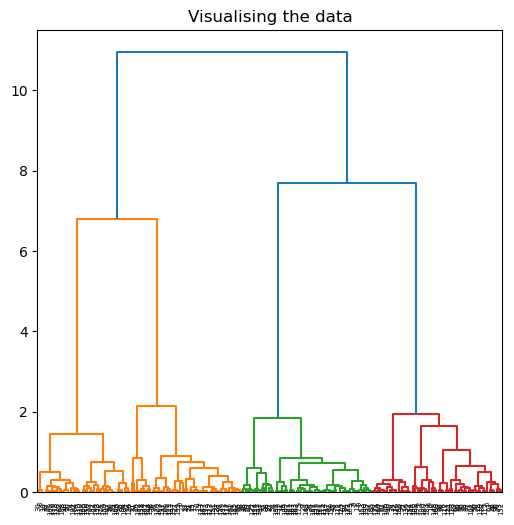

In [9]:
plt.figure(figsize =(6, 6))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(data_pca, method ='ward')))

*Determine the optimal number of clusters using [Silhouette Score]*

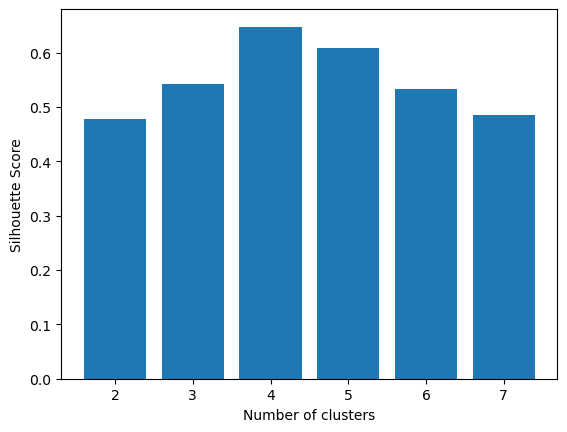

In [10]:
silhouette_scores = []

for n_cluster in range(2, 8):
    silhouette_scores.append(silhouette_score(data_pca, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(data_pca)))

# Plotting a bar graph to compare the results
k = [2, 3, 4, 5, 6,7]
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)
plt.show()

*Building and Visualizing clustering model for k = 4*

In [11]:
agg = AgglomerativeClustering(n_clusters=4)
agg.fit(data_pca)

AgglomerativeClustering(n_clusters=4)

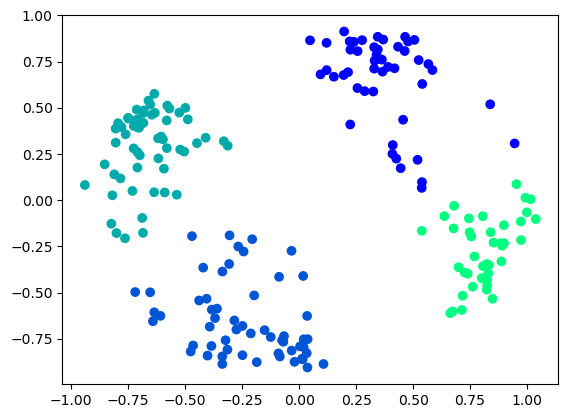

In [12]:
# Visualizing the clustering
plt.scatter(data_pca['P1'], data_pca['P2'],c = AgglomerativeClustering(n_clusters = 4).fit_predict(data_pca), cmap =plt.cm.winter)
plt.show()